In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
display(df)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
print("Shape:",df.shape)
print("Columns: \n",df.columns)

Shape: (918, 12)
Columns: 
 Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<AxesSubplot:xlabel='Sex', ylabel='count'>

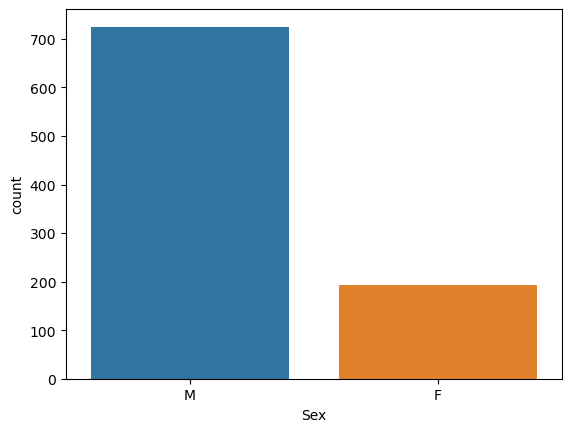

In [6]:
sns.countplot(x=df['Sex'])

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

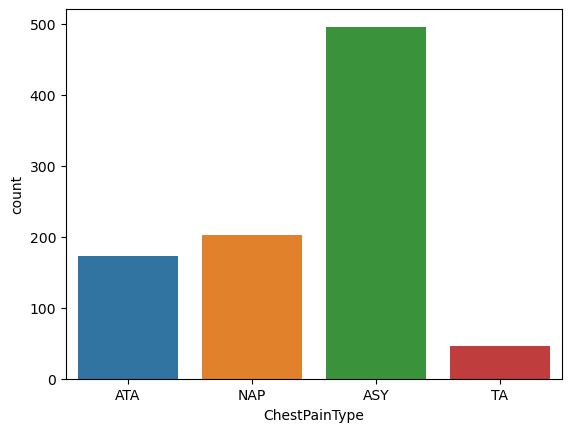

In [7]:
sns.countplot(x=df['ChestPainType'])

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

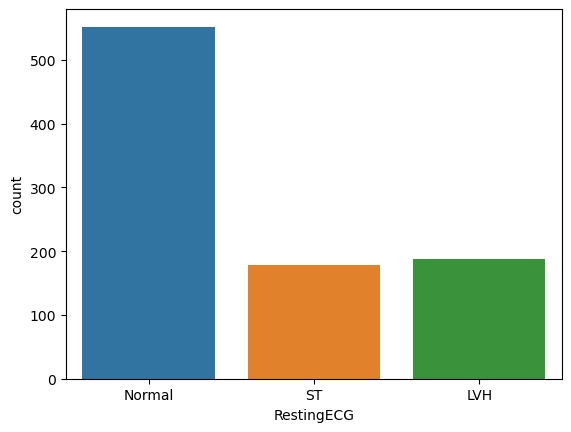

In [8]:
sns.countplot(x=df['RestingECG'])

In [9]:
from sklearn.preprocessing import OrdinalEncoder

In [10]:
en=OrdinalEncoder()

In [13]:
a=['Sex']
b=['ChestPainType']
c=['RestingECG']
d=['ExerciseAngina']
e=['ST_Slope']

In [14]:
df[a]=en.fit_transform(df[a])
df[b]=en.fit_transform(df[b])
df[c]=en.fit_transform(df[c])
df[d]=en.fit_transform(df[d])
df[e]=en.fit_transform(df[e])

In [17]:
df=df.astype({'Sex':'int','ChestPainType':'int','RestingECG':'int','ExerciseAngina':'int','ST_Slope':'int'})

In [18]:
cor=df.corr()
cor.style.background_gradient(cmap='winter')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x=df.iloc[:,0:11]
y=df['HeartDisease']

In [56]:
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.25,random_state=0)

In [57]:
xtr

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
279,54,0,1,130,253,0,2,155,0,0.0,2
451,64,1,0,144,0,0,2,122,1,1.0,1
39,48,0,0,150,227,0,1,130,1,1.0,1
557,56,1,2,137,208,1,2,122,1,1.8,1
548,66,1,0,112,261,0,1,140,0,1.5,2
...,...,...,...,...,...,...,...,...,...,...,...
835,54,1,0,110,239,0,1,126,1,2.8,1
192,48,1,1,130,245,0,1,160,0,0.0,2
629,57,0,0,128,303,0,0,159,0,0.0,2
559,64,1,0,134,273,0,1,102,1,4.0,0


In [58]:
# MODEL BUILDING
from sklearn.svm import SVC 

In [59]:
mod=SVC()
mod.fit(xtr,ytr)

SVC()

In [60]:
pred=mod.predict(xts)
print("Output: \n",pred)

Output: 
 [1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0
 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1
 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1
 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1
 1 0 1 1 0 1 1 1]


In [61]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [62]:
a=accuracy_score(yts,pred)
print("Accuracy:",a*100)
print("---------------------")
b=print("Classification Report is: \n",classification_report(yts,pred))
print('--------------------------------------')
c=confusion_matrix(yts,pred)
print("Confusion Matrix is: \n",c)

Accuracy: 71.30434782608695
---------------------
Classification Report is: 
               precision    recall  f1-score   support

           0       0.63      0.68      0.66        92
           1       0.78      0.73      0.75       138

    accuracy                           0.71       230
   macro avg       0.70      0.71      0.70       230
weighted avg       0.72      0.71      0.71       230

--------------------------------------
Confusion Matrix is: 
 [[ 63  29]
 [ 37 101]]


In [63]:
from sklearn.metrics import precision_score,f1_score,recall_score

In [64]:
d=precision_score(yts,pred)
e=recall_score(yts,pred)
f=f1_score(yts,pred)

In [65]:
print("Precision is:",d*100)
print("Recall is:",e*100)
print("F1-score is:",f*100)

Precision is: 77.6923076923077
Recall is: 73.18840579710145
F1-score is: 75.3731343283582


Text(0.5, 1.0, 'Confusion Matrix')

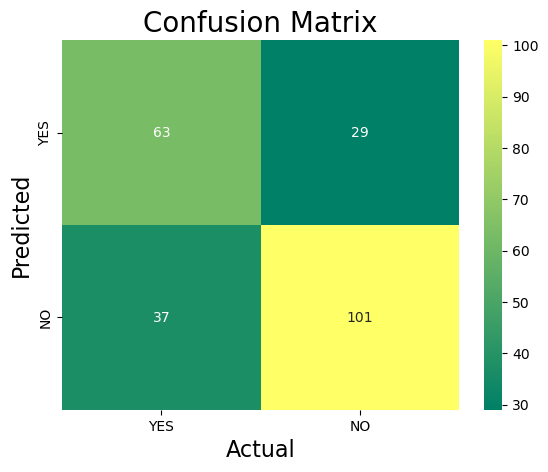

In [66]:
sns.heatmap(c,annot=True,fmt='g',cmap='summer',
            xticklabels=['YES','NO'],yticklabels=['YES','NO'])
plt.xlabel('Actual',fontsize=16)
plt.ylabel('Predicted',fontsize=16)
plt.title("Confusion Matrix",fontsize=20)